# On the vector noise

In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

from flow import uniform, solid_rot, lamb_oseen, sin_flow # test flow vector fields
from fdi2cdi import fdi2cdi # our implementation of FDI2CDI method                           

np.random.seed(202408) 

In [2]:
# Generate all test vector field
x = np.arange(0,256,1)
y = np.arange(0,256,1)
x, y = np.meshgrid(x,y)

# synthetic flow field
V1 = uniform(x,y)
V2 = solid_rot(x,y)
V3 = lamb_oseen(x,y)
V4 = sin_flow(x,y)

In [3]:
# Plot function of the results
def plot_show(results, iters, methods):
    linestyles = ['-', '--', (0, (3, 1, 1, 1)), ':', (0, (3, 1, 1, 1, 1, 1)), '-.', ':']
    plt.figure(figsize=(4.5,2.5))
    for k, method in enumerate(methods):
        plt.plot(iters,results[k,:],linestyle=linestyles[k], label=method)
    plt.legend(loc=1)
    plt.xlabel("Noise standard deviation (STD)")
    plt.ylabel("RMSE(pixel)")
    # plt.semilogy()
    plt.xlim(-0.05,2.05)
    plt.ylim(-0.05,2.05)
    plt.grid("on")
    plt.tight_layout()
    

# Test with an interpolation scheme
def test_one(V, method="BSPL3"):
    u_tru, v_tru = V[0]
    u_fdi, v_fdi = V[1]
    u_cdi, v_cdi = V[2]
    u_fdi2cdi, v_fdi2cdi = fdi2cdi(u_fdi, v_fdi, t=0, delta=1, method=method)

    error =  np.sqrt(np.square(u_fdi2cdi-u_cdi)+ np.square(v_fdi2cdi-v_cdi))
    rmse = np.sqrt(np.mean(np.square(error[25:-25,25:-25])))
    # print(rmse)
    return rmse

# Test with all interpolation schemes for a given vector field
def test_all(V):
    methods = ["BSPL3", "BSPL4", "BSPL5", "Bilinear", "Bicubic", "SINC8"]

    sigmas = np.linspace(0,2.0,11)
    # iters = np.array(np.arange(21))
    results = np.zeros((len(methods), len(sigmas)))

    for j,sigma in enumerate(sigmas):
        # noise version of the velocity field
        u_noise = sigma*np.random.randn(*x.shape)/np.sqrt(2)
        v_noise = sigma*np.random.randn(*x.shape)/np.sqrt(2)
        Vx = (V[0],(V[1][0]+u_noise,V[1][1]+v_noise),V[2])

        for i,method in enumerate(methods):
            rmse = test_one(Vx, method=method)
            results[i,j] = rmse

    plot_show(results, sigmas, methods)

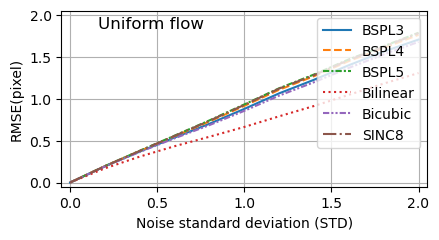

In [4]:
# The results with Vector field V1
test_all(V1)
plt.title("Uniform flow",x=0.10, y=0.85, loc='left')
plt.savefig("output/Fig7_ax.pdf")
plt.show()

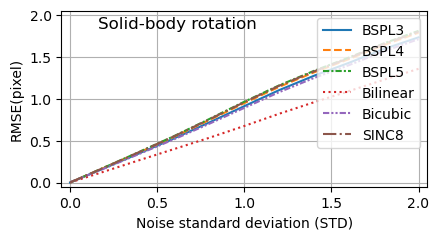

In [5]:
# The results with Vector field V2
test_all(V2)
plt.title("Solid-body rotation", x=0.10, y=0.85, loc='left')
plt.savefig("output/Fig7_bx.pdf")
plt.show()

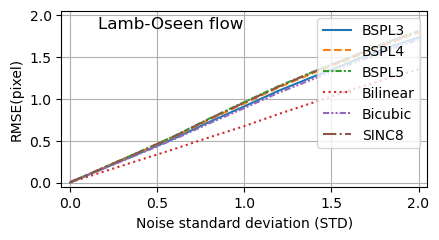

In [6]:
# The results with Vector field V3
test_all(V3)
plt.title("Lamb-Oseen flow", x=0.10, y=0.85, loc='left')
plt.savefig("output/Fig7_cx.pdf")
plt.show()

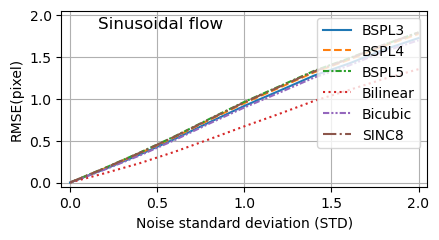

In [7]:
# The results with Vector field V4
test_all(V4)
plt.title("Sinusoidal flow", x=0.10, y=0.85, loc='left')
plt.savefig("output/Fig7_dx.pdf")
plt.show()